# MSA 2024 Phase 2 - Part 2

NOTE that this notebook is based on the output of the notebook in the previous part -- a file named "dataset_final.csv". Note that you refer to the notebook in the previous part to get the data set for this notebook.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## 1. Load and split preprocessed data

This notebook uses a csv file. The file contains the following information:

In [2]:
# Load the data set
data = pd.read_csv('dataset_final.csv', index_col='Order Date')

# Describe the dataset
print("Dataset information:")
print(data.info())
print("\nHead rows of the dataset:")
print(data.head())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 2014-01-12 to 2017-12-31
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sales                     208 non-null    float64
 1   Profit                    208 non-null    float64
 2   Ship Mode_First Class     208 non-null    int64  
 3   Ship Mode_Same Day        208 non-null    int64  
 4   Ship Mode_Second Class    208 non-null    int64  
 5   Ship Mode_Standard Class  208 non-null    int64  
 6   Segment_Consumer          208 non-null    int64  
 7   Segment_Corporate         208 non-null    int64  
 8   Segment_Home Office       208 non-null    int64  
 9   Region_Central            208 non-null    int64  
 10  Region_East               208 non-null    int64  
 11  Region_South              208 non-null    int64  
 12  Region_West               208 non-null    int64  
 13  Sub-Category_Bookcases    208 non

This dataset contains 208 records and 17 features, which are described as follows:

Numerical data (float64) : 2 columns (Sales and Profit), where Sales makes our target variable

Integer data (int64) : 15 columns (indicators of various modes of transport, market segments, regions, subcategories). Because in the data preprocessing, I integrated the data on a weekly basis. So these columns actually store the number of transactions involving that category feature in the corresponding week.

In addition, you can see in the output of the first few lines of the dataset, which is indexed by date. The specific value is the date of the first day of the week.

In [3]:
# Store the date index
dates = data.index 

# Set the features and the target column
X = data.drop(columns=['Sales'])  
y = data['Sales']  

# Split the dataset, as recommanded in the "Marking Criteria" of "Load and split preprocessed data" task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# Index for both sets
X_train_dates = dates[:len(X_train)]  
X_test_dates = dates[len(X_train):]  

# Print the size of the splited dataset
print("\nSize of train dataset:", X_train.shape)
print("Size of test dataset:", X_test.shape)

# Feature standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, index=X_train_dates, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, index=X_test_dates, columns=X.columns)



Size of train dataset: (145, 16)
Size of test dataset: (63, 16)


Currently, the data has been divided into training sets and test sets. For features, we also carried out standardization.

## 2. Choose an algorithm

As suggested in the Tips, I first chose a linear regression model. Secondly, due to the previous experience in data processing, I decided to choose Lasso regression model as my second model and perform parameter tuning on the Lasso model. Here is my brief description of how these two models work.

Linear regression model:
Linear regression is a basic regression analysis method that predicts the target variable by fitting a linear equation. The core idea of the model is to find an optimal linear relationship so that the input features (independent variables) and the target variables (dependent variables) are most closely related. Specifically, linear regression models adjust the model parameters by minimizing the mean square error (MSE) between the predicted and actual values to achieve the best prediction results.

Lasso regression model:
Lasso regression is an improved linear regression method that introduces L1 regularization terms on the basis of standard linear regression. The effect of the L1 regularization term is to impose a penalty on the regression coefficients, thereby limiting their absolute values. This not only helps prevent the model from overfitting, but also helps in feature selection, as some regression coefficients are compressed to zero. This enables Lasso regression to automatically select important features and ignore unimportant features, thereby improving the explanatory and generalizing power of the model.

## 3. Train and test a model

First train the linear regression model.

In [4]:
# Define and train the Linear Regression model
linear_reg = LinearRegression()

linear_reg.fit(X_train_scaled_df, y_train)

# Predict
y_pred_train_lr = linear_reg.predict(X_train_scaled_df)
y_pred_test_lr = linear_reg.predict(X_test_scaled_df)


print(f"Linear Regression model finished training.")


Linear Regression model finished training.


Since regression models have no concept of accuracy, we print some simple metrics for model's predictions. A more detailed analysis is presented in the next section - “Evaluate the model”.

In [5]:
# Evaluate the model
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    # Avoid division by zero
    nonzero_mask = y_true != 0
    return np.mean(np.abs((y_true[nonzero_mask] - y_pred[nonzero_mask]) / y_true[nonzero_mask])) * 100

# Calculate MAPE for the test set
mape_test_lr = mean_absolute_percentage_error(y_test, y_pred_test_lr)

def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred))) * 100

smape_lr = smape(y_test, y_pred_test_lr)

# Print results
print(f"Linear Regression model Mean Squared Error (Training set): {mse_train_lr:.2f}")
print(f"Linear Regression model Mean Squared Error (Test set): {mse_test_lr:.2f}")
print(f"Linear Regression model R^2 Score (Training set): {r2_train_lr:.2f}")
print(f"Linear Regression model R^2 Score (Test set): {r2_test_lr:.2f}")
print(f"Linear Regression model SMAPE (Test set): {smape_lr:.2f}%")


Linear Regression model Mean Squared Error (Training set): 1076002.84
Linear Regression model Mean Squared Error (Test set): 1329899.80
Linear Regression model R^2 Score (Training set): 0.80
Linear Regression model R^2 Score (Test set): 0.75
Linear Regression model SMAPE (Test set): 36.52%


Here is a simple visualization of the linear regression model. Set the actual value and the predicted value as horizontal and vertical coordinates respectively, and draw a straight line y=x in the graph. The deviation of the point from the straight line reflects the deviation of the prediction to some extent.

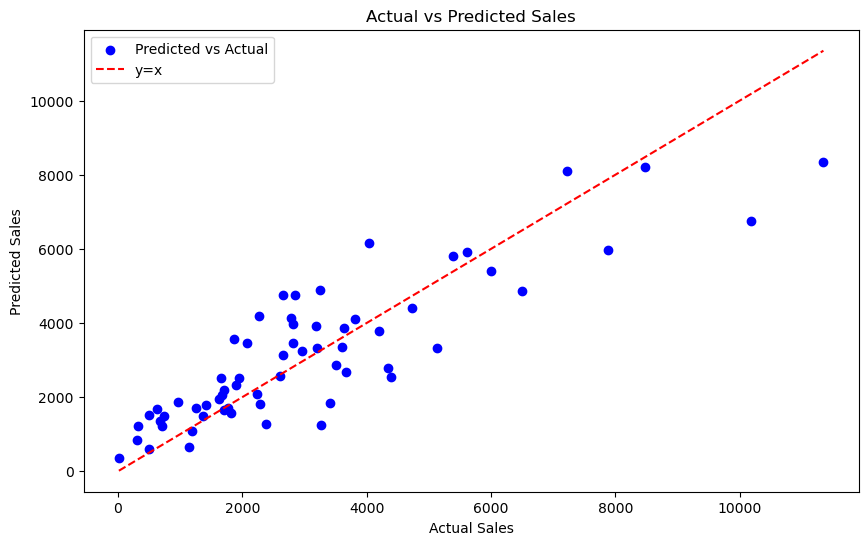

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_lr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y=x')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()


The points are generally around the straight line, indicating that the prediction ability of the model is generally good.

Next, the Lasso model is trained and initially evaluated

In [7]:
lasso = Lasso(alpha=1, max_iter=10000,tol=1e-4)

lasso.fit(X_train_scaled_df, y_train)

y_pred_train_lasso = lasso.predict(X_train_scaled_df)
y_pred_test_lasso = lasso.predict(X_test_scaled_df)

# Evaluate the mode
mse_train = mean_squared_error(y_train, y_pred_train_lasso)
mse_test = mean_squared_error(y_test, y_pred_test_lasso)
r2_train = r2_score(y_train, y_pred_train_lasso)
r2_test = r2_score(y_test, y_pred_test_lasso)

smape_lasso = smape(y_test, y_pred_test_lasso)

# Print the result
print(f"Lasso Regression model Mean Squared Error (Training set): {mse_train:.2f}")
print(f"Lasso Regression model Mean Squared Error (Test set): {mse_test:.2f}")
print(f"Lasso Regression model R^2 Score (Training set): {r2_train:.2f}")
print(f"Lasso Regression model R^2 Score (Test set): {r2_test:.2f}")
print(f"Lasso Regression model SMAPE (Test set): {smape_lasso:.2f}%")

Lasso Regression model Mean Squared Error (Training set): 1076011.88
Lasso Regression model Mean Squared Error (Test set): 1330283.17
Lasso Regression model R^2 Score (Training set): 0.80
Lasso Regression model R^2 Score (Test set): 0.75
Lasso Regression model SMAPE (Test set): 36.51%


Here's how to tune the model. I used GridSearchCV for parameter tuning. The detailed steps and preliminary results are shown in print.

If the following cell takes a long time to run, don't panic. I set the number of iterations high to avoid overshooting.

In [8]:
# Define Lasso model and parameter grid
lasso_tune = Lasso(max_iter=10000000, tol=1e-4)  

param_grid = {
    'alpha': np.logspace(-4, 4, 20)  # Alpha parameter range from 10^-4 to 10^4
}

# Use GridSearchCV for parameter tuning
grid_search = GridSearchCV(estimator=lasso_tune, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled_df, y_train)

# Get the best parameters and best model
best_alpha = grid_search.best_params_['alpha']
best_lasso = grid_search.best_estimator_

y_pred_train_lasso_tune = best_lasso.predict(X_train_scaled_df)
y_pred_test_lasso_tune = best_lasso.predict(X_test_scaled_df)

# Evaluate the model
mse_train_t = mean_squared_error(y_train, y_pred_train_lasso_tune)
mse_test_t = mean_squared_error(y_test, y_pred_test_lasso_tune)
r2_train_t = r2_score(y_train, y_pred_train_lasso_tune)
r2_test_t = r2_score(y_test, y_pred_test_lasso_tune)

smape_lasso_tune = smape(y_test, y_pred_test_lasso_tune)

# Print results
print(f"Best alpha: {best_alpha:.4f}")
print(f"Lasso regression model Mean Squared Error (Training set): {mse_train_t:.2f}")
print(f"Lasso regression model Mean Squared Error (Test set): {mse_test_t:.2f}")
print(f"Lasso regression model R^2 Score (Training set): {r2_train_t:.2f}")
print(f"Lasso regression model R^2 Score (Test set): {r2_test_t:.2f}")
print(f"Lasso regression model Test Set SMAPE: {smape_lasso_tune:.2f}%")


/Users/haobo/Documents/Haobo/Tools/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.644e+06, tolerance: 6.347e+04
  model = cd_fast.enet_coordinate_descent(
/Users/haobo/Documents/Haobo/Tools/anaconda/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.478e+06, tolerance: 6.698e+04
  model = cd_fast.enet_coordinate_descent(


Best alpha: 29.7635
Lasso regression model Mean Squared Error (Training set): 1079470.22
Lasso regression model Mean Squared Error (Test set): 1344764.26
Lasso regression model R^2 Score (Training set): 0.80
Lasso regression model R^2 Score (Test set): 0.75
Lasso regression model Test Set SMAPE: 36.30%


There are a lot of error messages that don't converge (although I've increased the number of iterated words to 1000 times the number originally designed). This may be because an overlimit occurs when iterating with different parameters. But we still get a "best" parameter. The evaluation of the model and tuning is done in the next section.

## 4. Evaluate the model 

The first is the visualization of forecast data. One thing I don't quite understand here is that we are asked to divide the data according to a specified random seed and distribution ratio, which means that the data is divided randomly. So how do you specify four weeks of forecast sales? Unfortunately, I didn't have a solution in mind until the submission deadline, so I simply visually compared the actual and predicted data from the training and test sets.

The first is a comparison of linear regression models.

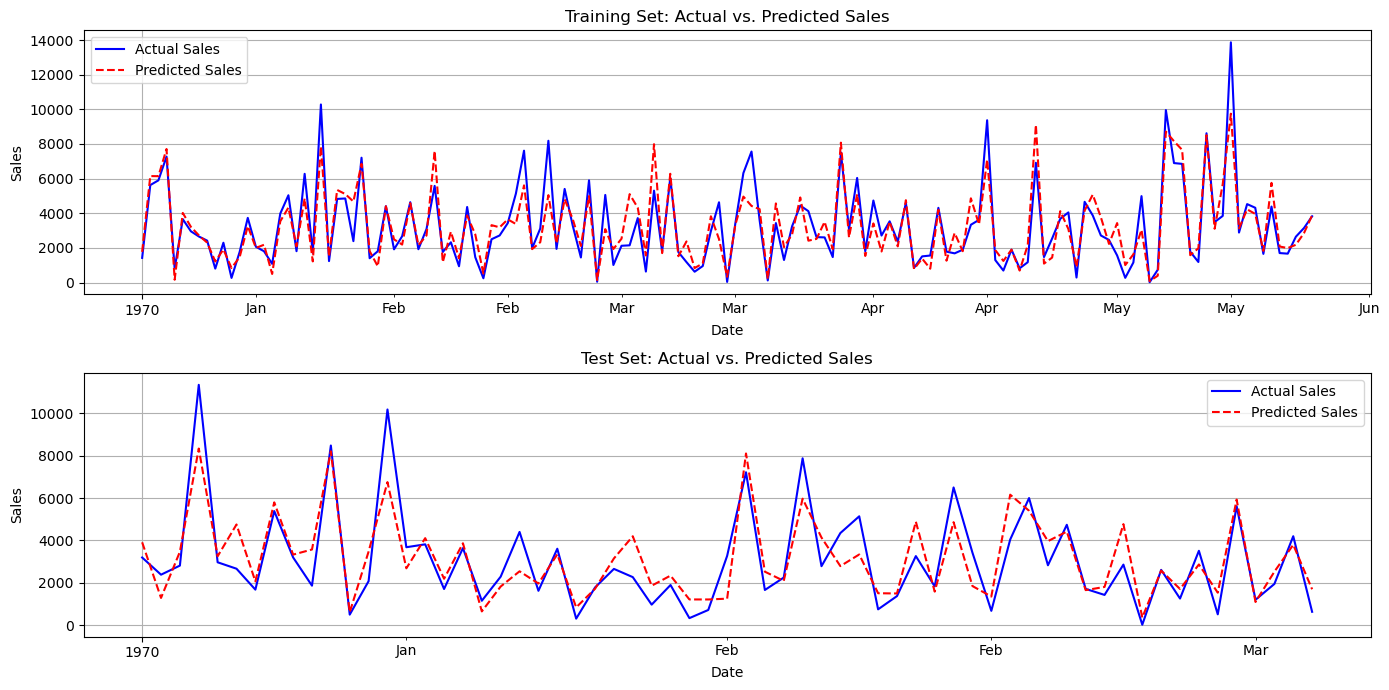

In [9]:
import matplotlib.dates as mdates

df_train_predictions_lr = pd.DataFrame({
    'Date': X_train_dates,
    'Actual Sales': y_train,
    'Predicted Sales': y_pred_train_lr
})

df_test_predictions_lr = pd.DataFrame({
    'Date': X_test_dates,
    'Actual Sales': y_test,
    'Predicted Sales': y_pred_test_lr
})

# Plot actual and predicted sales for training and test sets
plt.figure(figsize=(14, 7))

# Plot actual and predicted sales for the training set
plt.subplot(2, 1, 1)
plt.plot(df_train_predictions_lr['Date'], df_train_predictions_lr['Actual Sales'], label='Actual Sales', color='blue')
plt.plot(df_train_predictions_lr['Date'], df_train_predictions_lr['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--')
plt.title('Training Set: Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Set x-axis date format and ticks to avoid overlapping of x-axis labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=[1, 15]))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.gca().tick_params(axis='x', which='both', rotation=0)  

# Plot actual and predicted sales for the test set
plt.subplot(2, 1, 2)
plt.plot(df_test_predictions_lr['Date'], df_test_predictions_lr['Actual Sales'], label='Actual Sales', color='blue')
plt.plot(df_test_predictions_lr['Date'], df_test_predictions_lr['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--')
plt.title('Test Set: Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Set x-axis date format and ticks to avoid overlapping of x-axis labels
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=[1, 15])) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.gca().tick_params(axis='x', which='both', rotation=0)  

plt.tight_layout()
plt.show()


Next is a comparison of Lasso regression models

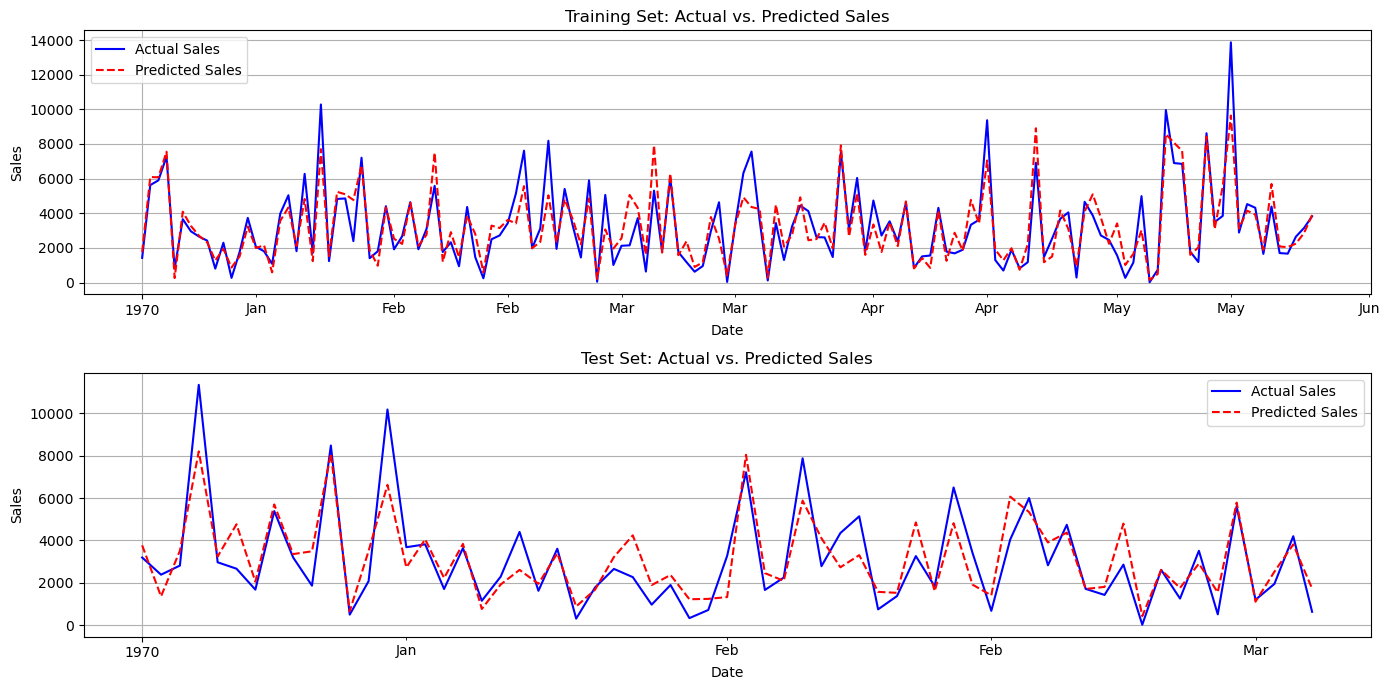

In [10]:
import matplotlib.dates as mdates

df_train_predictions_lasso = pd.DataFrame({
    'Date': X_train_dates,
    'Actual Sales': y_train,
    'Predicted Sales': y_pred_train_lasso_tune
})

df_test_predictions_lasso = pd.DataFrame({
    'Date': X_test_dates,
    'Actual Sales': y_test,
    'Predicted Sales': y_pred_test_lasso_tune
})

# Plot actual and predicted sales for training and test sets
plt.figure(figsize=(14, 7))

# Plot for the training set
plt.subplot(2, 1, 1)
plt.plot(df_train_predictions_lasso['Date'], df_train_predictions_lasso['Actual Sales'], label='Actual Sales', color='blue')
plt.plot(df_train_predictions_lasso['Date'], df_train_predictions_lasso['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--')
plt.title('Training Set: Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Set x-axis date format and ticks to avoid overlapping of x-axis labels (same as above cell)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=[1, 15])) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.gca().tick_params(axis='x', which='both', rotation=0)  

# Plot actual and predicted sales for the test set
plt.subplot(2, 1, 2)
plt.plot(df_test_predictions_lasso['Date'], df_test_predictions_lasso['Actual Sales'], label='Actual Sales', color='blue')
plt.plot(df_test_predictions_lasso['Date'], df_test_predictions_lasso['Predicted Sales'], label='Predicted Sales', color='red', linestyle='--')
plt.title('Test Set: Actual vs. Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)

# Set x-axis date format and ticks to avoid overlapping of x-axis labels (same as above cell)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=[1, 15]))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_minor_formatter(mdates.DateFormatter('%b'))
plt.gca().tick_params(axis='x', which='both', rotation=0)  

plt.tight_layout()
plt.show()


Please note that for the second set of images, we directly used the model after parameter tuning.

Combining these two sets of pictures, we can conclude that although there are some differences in individual specific values, the model has obtained reasonable results in terms of the overall trend and the prediction of most values. The specific numerical indicators are compared and analyzed in the following matrix:

In [11]:
# Create the metric
results_df = pd.DataFrame({
    'Metric': ['SMAPE', 'MSE', 'R^2'],
    'Linear Regression': [smape_lr, mse_test_lr, r2_test_lr],
    'Lasso (Before Tuning)': [smape_lasso, mse_test, r2_test],
    'Lasso (After Tuning)': [smape_lasso_tune, mse_test_t, r2_test_t]
})

# Set 'Metric' to index
results_df.set_index('Metric', inplace=True)

print(results_df)

        Linear Regression  Lasso (Before Tuning)  Lasso (After Tuning)
Metric                                                                
SMAPE        3.651526e+01           3.650819e+01          3.629926e+01
MSE          1.329900e+06           1.330283e+06          1.344764e+06
R^2          7.519780e-01           7.519065e-01          7.492058e-01


Please note that the above data is from the test set - we will be evaluating the model on the basis of the test set.

Firstly, from the perspective of vertical comparison, all three models can achieve model fitting and result prediction to a certain extent. A SMAPE of 36% means that the relative error between the predicted value and the actual value is about 36%. A SMAPE value of 36% May indicate that the predictive power of the model is fair, but there is room for improvement. 

The number of MSE is determined based on the specific sales. So if my target variable is in dollars, MSE is in dollars ^2. There is no absolute standard that defines an MSE as good or bad, as this depends on the specific context of the problem and the size of the data.

An R² value of 0.75 indicates that the model explains 75% of the variance of the target variable. In other words, the model explains 75% of the variation in the target variable, and the remaining 25% is due to unexplained factors. An R² value of 0.75 is considered a good model fit. In general, the closer the R² value is to 1, the more explanatory the model is. 0.75 indicates that the model has a fairly high explanatory power in the prediction

The second is the horizontal contrast. In this section we find an interesting phenomenon: the performance of the three models is almost the same. Although model tuning reduced SMAPE's data by about 2%, overall the three models showed similar fitting and prediction capabilities. This may be because I chose the alpha parameter of the Lasso model when tuning the model. This parameter is often used to control the degree of regularization. This is the biggest difference between linear regression model and Lasso model. The similarity of these three models may indicate that the features of this dataset are very close to linear.


## 5. Summary

In summary, this notebook implements the process of training and evaluating machine learning models based on the data set generated by the previous notebook. 

The first is to split the data according to the specified split ratio and random seeds. In this step, I extracted additional dates as indexes for subsequent data visualization and comparison. 

Then I used linear regression model and Lasso regression model respectively for training and preliminary evaluation. And the alpha parameters are tuned for Lasso model. 

Finally, according to the obtained model and evaluation index, the performance of the model is systematically analyzed. The obtained model can predict the data to a certain extent, but there is still room for improvement. At the same time, through the horizontal comparison of the model, we also found that the data set may have relatively high linearity.